<a href="https://colab.research.google.com/github/2003MADHAV/codesoft/blob/main/Network_Intrusion_Detection_and_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Training and Testing Dataset into Panda Dataframe

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
import pandas as pd

In [63]:
train_data = pd.read_csv("/content/drive/MyDrive/Network-Intrusion-Detection dataSet/UNSW_NB15_training-set.csv", index_col='id')
test_data = pd.read_csv("/content/drive/MyDrive/Network-Intrusion-Detection dataSet/UNSW_NB15_testing-set.csv", index_col='id')

In [64]:
train_data.sample(5)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,
30547,0.001665,udp,-,CON,4,4,512,304,4204.204232,31,...,1,3,0,0,0,3,6,0,Normal,0
59068,0.000002,udp,dns,INT,2,0,114,0,500000.001300,254,...,2,2,0,0,0,2,9,0,Generic,1
77880,0.000011,udp,-,INT,2,0,1350,0,90909.090200,254,...,1,26,0,0,0,18,26,0,Normal,0
48097,1.515474,ospf,-,INT,42,0,1890,0,27.054242,254,...,2,2,0,0,0,2,2,0,DoS,1
72075,0.529367,tcp,-,FIN,10,8,1612,354,32.113825,254,...,1,8,0,0,0,1,8,0,Normal,0


## Checking for Sample data from Training and Testing Dataset

In [65]:
test_data.sample(5)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,
29039,1.644729,tcp,ftp,FIN,52,54,2934,3742,63.840304,31,...,1,4,1,1,0,3,1,0,Normal,0
90025,9.576091,ospf,-,INT,40,0,10880,0,4.072643,254,...,1,1,0,0,0,2,1,0,Exploits,1
88692,1.250414,tcp,-,FIN,14,8,2126,718,16.794437,254,...,1,2,0,0,0,1,2,0,Fuzzers,1
54778,0.000008,ax.25,-,INT,2,0,200,0,125000.000300,254,...,2,6,0,0,0,2,6,0,Exploits,1
71833,0.591037,tcp,-,FIN,10,8,540,354,28.763006,254,...,1,7,0,0,0,2,8,0,Normal,0


In [66]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82332 entries, 1 to 82332
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                82332 non-null  float64
 1   proto              82332 non-null  object 
 2   service            82332 non-null  object 
 3   state              82332 non-null  object 
 4   spkts              82332 non-null  int64  
 5   dpkts              82332 non-null  int64  
 6   sbytes             82332 non-null  int64  
 7   dbytes             82332 non-null  int64  
 8   rate               82332 non-null  float64
 9   sttl               82332 non-null  int64  
 10  dttl               82332 non-null  int64  
 11  sload              82332 non-null  float64
 12  dload              82332 non-null  float64
 13  sloss              82332 non-null  int64  
 14  dloss              82332 non-null  int64  
 15  sinpkt             82332 non-null  float64
 16  dinpkt             823

In [67]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175341 entries, 1 to 175341
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                175341 non-null  float64
 1   proto              175341 non-null  object 
 2   service            175341 non-null  object 
 3   state              175341 non-null  object 
 4   spkts              175341 non-null  int64  
 5   dpkts              175341 non-null  int64  
 6   sbytes             175341 non-null  int64  
 7   dbytes             175341 non-null  int64  
 8   rate               175341 non-null  float64
 9   sttl               175341 non-null  int64  
 10  dttl               175341 non-null  int64  
 11  sload              175341 non-null  float64
 12  dload              175341 non-null  float64
 13  sloss              175341 non-null  int64  
 14  dloss              175341 non-null  int64  
 15  sinpkt             175341 non-null  float64
 16  di

In [68]:
print('Number of instances=%d'%(train_data.shape[0]))
print('Number of attributes=%d'%(train_data.shape[1]))
print('Number of instances=%d'%(test_data.shape[0]))
print('Number of attributes=%d'%(test_data.shape[1]))

Number of instances=82332
Number of attributes=44
Number of instances=175341
Number of attributes=44


In [69]:
print('Number of missing values:')
[(x, y) for x, y in zip(train_data.isna().sum(), train_data.isna().sum().index) if x > 0]


Number of missing values:


[]

In [70]:
print('Number of missing values:')
[(x, y) for x, y in zip(test_data.isna().sum(), test_data.isna().sum().index) if x > 0]

Number of missing values:


[]

In [71]:
import numpy as np

In [72]:
train_data=train_data.replace('-',np.nan)
for column in train_data.columns:
    print('\t%s: %d'%(column,train_data[column].isnull().sum()))

	dur: 0
	proto: 0
	service: 47153
	state: 0
	spkts: 0
	dpkts: 0
	sbytes: 0
	dbytes: 0
	rate: 0
	sttl: 0
	dttl: 0
	sload: 0
	dload: 0
	sloss: 0
	dloss: 0
	sinpkt: 0
	dinpkt: 0
	sjit: 0
	djit: 0
	swin: 0
	stcpb: 0
	dtcpb: 0
	dwin: 0
	tcprtt: 0
	synack: 0
	ackdat: 0
	smean: 0
	dmean: 0
	trans_depth: 0
	response_body_len: 0
	ct_srv_src: 0
	ct_state_ttl: 0
	ct_dst_ltm: 0
	ct_src_dport_ltm: 0
	ct_dst_sport_ltm: 0
	ct_dst_src_ltm: 0
	is_ftp_login: 0
	ct_ftp_cmd: 0
	ct_flw_http_mthd: 0
	ct_src_ltm: 0
	ct_srv_dst: 0
	is_sm_ips_ports: 0
	attack_cat: 0
	label: 0


## Replacing null values with nan
- ### Replacing the null values with NAN values as by doing analysis of training and testing dataset we found that services column contains major number of Null values which is not providing valuable information to the model.

In [73]:
test_data=test_data.replace('-',np.nan)
for column in test_data.columns:
    print('\t%s: %d'%(column,test_data[column].isnull().sum()))

	dur: 0
	proto: 0
	service: 94168
	state: 0
	spkts: 0
	dpkts: 0
	sbytes: 0
	dbytes: 0
	rate: 0
	sttl: 0
	dttl: 0
	sload: 0
	dload: 0
	sloss: 0
	dloss: 0
	sinpkt: 0
	dinpkt: 0
	sjit: 0
	djit: 0
	swin: 0
	stcpb: 0
	dtcpb: 0
	dwin: 0
	tcprtt: 0
	synack: 0
	ackdat: 0
	smean: 0
	dmean: 0
	trans_depth: 0
	response_body_len: 0
	ct_srv_src: 0
	ct_state_ttl: 0
	ct_dst_ltm: 0
	ct_src_dport_ltm: 0
	ct_dst_sport_ltm: 0
	ct_dst_src_ltm: 0
	is_ftp_login: 0
	ct_ftp_cmd: 0
	ct_flw_http_mthd: 0
	ct_src_ltm: 0
	ct_srv_dst: 0
	is_sm_ips_ports: 0
	attack_cat: 0
	label: 0


In [74]:
 #sort by dtype, we'll mostly treat the numerics the same though
discrete_vars=['dur','spkts','dpkts','sbytes','dbytes','rate','sttl','dttl','sload','dload','sloss'
              ,'dloss','sinpkt','dinpkt','sjit','djit','swin','stcpb','dtcpb','tcprtt',
               'synack','ackdat','smean','dmean','trans_depth','response_body_len','ct_srv_src','ct_state_ttl',
               'ct_dst_ltm','ct_dst_sport_ltm','ct_dst_src_ltm','is_ftp_login','ct_ftp_cmd',
               'ct_flw_http_mthd','ct_src_ltm','ct_srv_dst','is_sm_ips_ports']
categorical_vars=['proto','service','state','attack_cat']


In [75]:
for i in categorical_vars:
    print(train_data[i].value_counts())
    print()

tcp           43095
udp           29418
unas           3515
arp             987
ospf            676
              ...  
br-sat-mon       32
pvp              32
wsn              32
ib               31
igmp             30
Name: proto, Length: 131, dtype: int64

dns         21367
http         8287
smtp         1851
ftp          1552
ftp-data     1396
pop3          423
ssh           204
ssl            30
snmp           29
dhcp           26
radius          9
irc             5
Name: service, dtype: int64

FIN    39339
INT    34163
CON     6982
REQ     1842
ACC        4
RST        1
CLO        1
Name: state, dtype: int64

Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64



- ### Finding out the frequency of occurence of Proto, Service, State and Attack_cat columns contains

In [76]:
for i in categorical_vars:
    print(test_data[i].value_counts())
    print()

tcp       79946
udp       63283
unas      12084
arp        2859
ospf       2595
          ...  
rdp          98
netblt       98
igmp         18
icmp         15
rtp           1
Name: proto, Length: 133, dtype: int64

dns         47294
http        18724
smtp         5058
ftp-data     3995
ftp          3428
ssh          1302
pop3         1105
dhcp           94
snmp           80
ssl            56
irc            25
radius         12
Name: service, dtype: int64

INT    82275
FIN    77825
CON    13152
REQ     1991
RST       83
ECO       12
PAR        1
URN        1
no         1
Name: state, dtype: int64

Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64



In [77]:
d = {'INT':'INT', 'FIN':'FIN', 'CON':'CON', 'ECO':'OTHER', 'REQ':'REQ', 'RST':'RST', 'PAR':'OTHER', 'URN':'OTHER', 'no':'OTHER', 'ACC':'OTHER', 'CLO':'OTHER'}
train_data['state'] = train_data['state'].map(lambda s: d[s])

## Detecting Outlier in the Proto column
- ### Outliers deviate the mean of the model prediction and make model worse. After Performing value_counts() method we found large number of data is ‘tcp’, ‘udp’, ‘unas’ and ‘arp’. So, grouping the others value into one set and ‘tcp’, ‘udp’, ‘unas’ and ‘arp’ as individual will help to drop the unwanted rows.

In [78]:
repeated_occurances_proto=['tcp','udp','unas','arp']
def encoding_categoricals(column):
    if column in repeated_occurances_proto:
        return column
    else:
        return "other"

In [79]:
train_data['proto'] = train_data['proto'].apply(encoding_categoricals)
test_data['proto'] = test_data['proto'].apply(encoding_categoricals)

train_data = train_data[train_data['proto'] != 'other']
test_data = test_data[test_data['proto'] != "other"]

## One-Hot Encoding to the categorical features
- ### Applied One-hot encoding to the ‘State’ and ‘Proto’ features to convert the category into integer and it becomes easy to normalize afterwards.

In [80]:
one_hot = pd.get_dummies(train_data['state'])
train_data = train_data.drop('state', axis=1)
train_data = train_data.join(one_hot)

one_hot = pd.get_dummies(train_data['proto'])
train_data = train_data.drop('proto', axis=1)
train_data = train_data.join(one_hot)

In [81]:
d = {'INT':'INT', 'FIN':'FIN', 'CON':'CON', 'REQ':'REQ', 'RST':'RST', 'ACC':'OTHER', 'CLO':'OTHER','PAR':'OTHER', 'URN':'OTHER', 'no':'OTHER'}
test_data['state'] = test_data['state'].map(lambda s: d[s])

In [82]:
one_hot = pd.get_dummies(test_data['state'])
test_data = test_data.drop('state', axis=1)
test_data = test_data.join(one_hot)

one_hot = pd.get_dummies(test_data['proto'])
test_data = test_data.drop('proto', axis=1)
test_data = test_data.join(one_hot)

In [83]:
test_data

,dur,service,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,label,CON,FIN,INT,REQ,RST,arp,tcp,udp,unas
id,,,,,,,,,,,,,,,,,,,,,
1,0.121478,NaN,6,4,258,172,74.087490,252,254,1.415894e+04,...,0,0,1,0,0,0,0,1,0,0
2,0.649902,NaN,14,38,734,42014,78.473372,62,252,8.395112e+03,...,0,0,1,0,0,0,0,1,0,0
3,1.623129,NaN,8,16,364,13186,14.170161,62,252,1.572272e+03,...,0,0,1,0,0,0,0,1,0,0
4,1.681642,ftp,12,12,628,770,13.677108,62,252,2.740179e+03,...,0,0,1,0,0,0,0,1,0,0
5,0.449454,NaN,10,6,534,268,33.373826,254,252,8.561499e+03,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175337,0.000009,dns,2,0,114,0,111111.107200,254,0,5.066666e+07,...,1,0,0,1,0,0,0,0,1,0
175338,0.505762,NaN,10,8,620,354,33.612649,254,252,8.826286e+03,...,1,0,1,0,0,0,0,1,0,0
175339,0.000009,dns,2,0,114,0,111111.107200,254,0,5.066666e+07,...,1,0,0,1,0,0,0,0,1,0


In [84]:
train_data

,dur,service,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,CON,FIN,INT,OTHER,REQ,RST,arp,tcp,udp,unas
id,,,,,,,,,,,,,,,,,,,,,
1,0.000011,NaN,2,0,496,0,90909.090200,254,0,1.803636e+08,...,0,0,1,0,0,0,0,0,1,0
2,0.000008,NaN,2,0,1762,0,125000.000300,254,0,8.810000e+08,...,0,0,1,0,0,0,0,0,1,0
3,0.000005,NaN,2,0,1068,0,200000.005100,254,0,8.544000e+08,...,0,0,1,0,0,0,0,0,1,0
4,0.000006,NaN,2,0,900,0,166666.660800,254,0,6.000000e+08,...,0,0,1,0,0,0,0,0,1,0
5,0.000010,NaN,2,0,2126,0,100000.002500,254,0,8.504000e+08,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82328,0.000005,NaN,2,0,104,0,200000.005100,254,0,8.320000e+07,...,0,0,1,0,0,0,0,0,1,0
82329,1.106101,NaN,20,8,18062,354,24.410067,254,252,1.241044e+05,...,0,1,0,0,0,0,0,1,0,0
82330,0.000000,NaN,1,0,46,0,0.000000,0,0,0.000000e+00,...,0,0,1,0,0,0,1,0,0,0


## Plot Correlation matrix using Heatmap
- #### Plotted Correlated heatmap helps to understand the correlation between the features.
- #### After multiple trial and error we found 0.9 limit for correlation matrix between feature provides the important features for training model.

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-86-c12df8cd47a4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_data.corr(method='pearson') #  ‘pearson’, ‘kendall’, ‘spearman’


<Axes: >

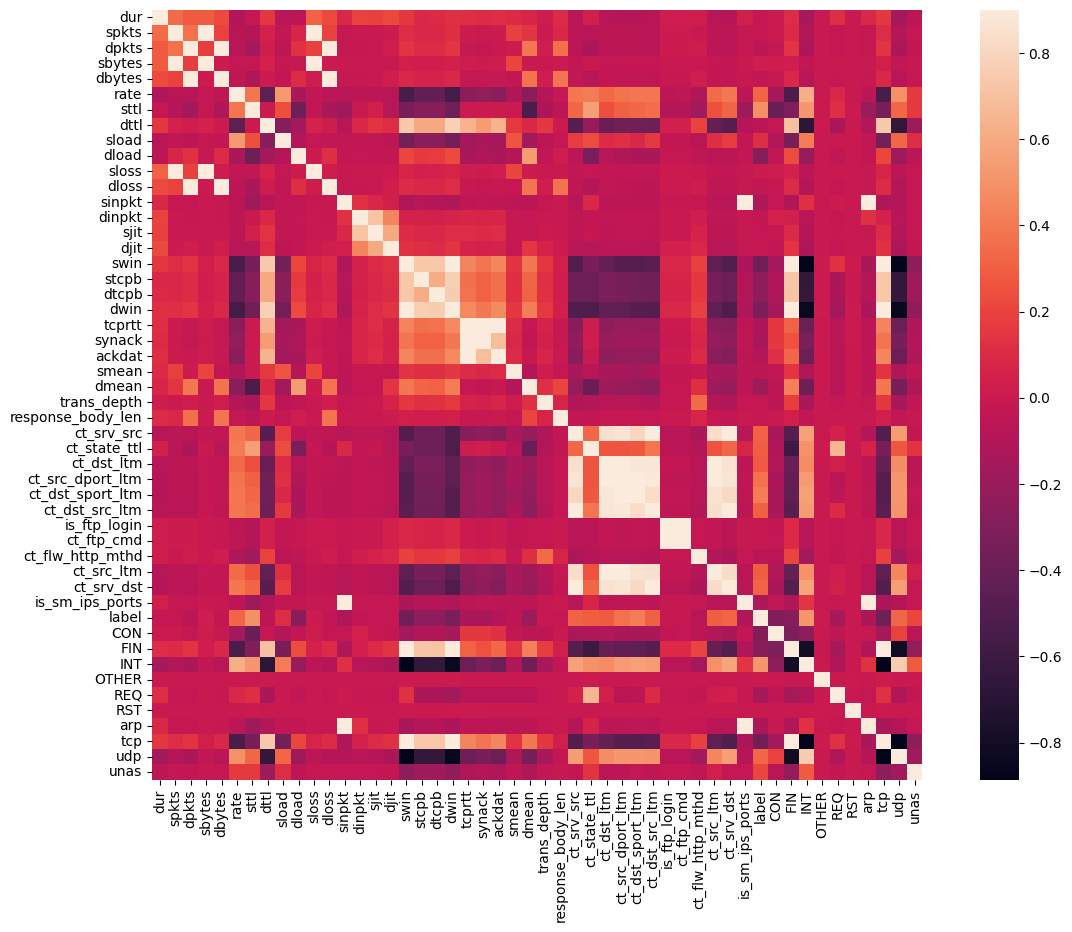

In [86]:
corr_matrix = train_data.corr(method='pearson') #  ‘pearson’, ‘kendall’, ‘spearman’
fig = plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,vmax=0.9,square = True)

In [87]:
train_data.head()

,dur,service,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,CON,FIN,INT,OTHER,REQ,RST,arp,tcp,udp,unas
id,,,,,,,,,,,,,,,,,,,,,
1,0.000011,NaN,2,0,496,0,90909.0902,254,0,180363632.0,...,0,0,1,0,0,0,0,0,1,0
2,0.000008,NaN,2,0,1762,0,125000.0003,254,0,881000000.0,...,0,0,1,0,0,0,0,0,1,0
3,0.000005,NaN,2,0,1068,0,200000.0051,254,0,854400000.0,...,0,0,1,0,0,0,0,0,1,0
4,0.000006,NaN,2,0,900,0,166666.6608,254,0,600000000.0,...,0,0,1,0,0,0,0,0,1,0
5,0.000010,NaN,2,0,2126,0,100000.0025,254,0,850400000.0,...,0,0,1,0,0,0,0,0,1,0


In [88]:
columns = corr_matrix.columns
for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[0]):
         if corr_matrix.iloc[i,j] >= 0.9:
                print(f"{columns[i]} - {columns[j]} - {corr_matrix.iloc[i,j]}")

spkts - sbytes - 0.9660881777219213
spkts - sloss - 0.9745488254741645
dpkts - dbytes - 0.9765382790832435
dpkts - dloss - 0.9815387553366451
sbytes - sloss - 0.9954325482368033
dbytes - dloss - 0.9971301523017899
sinpkt - is_sm_ips_ports - 0.9450971215680893
sinpkt - arp - 0.938386093511183
swin - dwin - 0.9570606658276176
swin - FIN - 0.9067074693072257
swin - tcp - 0.9999063254299976
dwin - FIN - 0.9467421420602843
dwin - tcp - 0.9570845724944941
tcprtt - synack - 0.9387890846692
ct_srv_src - ct_dst_src_ltm - 0.9452913996423367
ct_srv_src - ct_srv_dst - 0.9780727383138768
ct_dst_ltm - ct_src_dport_ltm - 0.9603286595042676
ct_dst_ltm - ct_src_ltm - 0.9378822737896583
ct_src_dport_ltm - ct_dst_sport_ltm - 0.9117425324713825
ct_src_dport_ltm - ct_src_ltm - 0.9382033746119325
ct_dst_src_ltm - ct_srv_dst - 0.9502171823339576
is_ftp_login - ct_ftp_cmd - 0.9943377877118692
is_sm_ips_ports - arp - 0.958652268568094
FIN - tcp - 0.9065541349207776


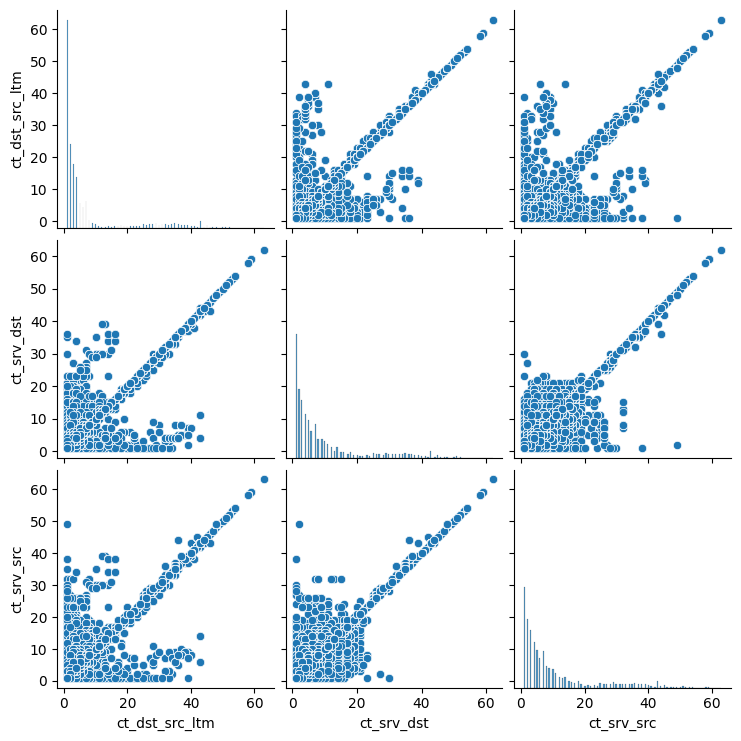

In [89]:
sns.pairplot(train_data[['ct_dst_src_ltm', 'ct_srv_dst','ct_srv_src']])
plt.show()

## Dropping the column which is not highly correlated.

In [90]:
train_data.drop(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'stcpb', 'dtcpb', 'dwin', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'is_sm_ips_ports', 'tcp', 'CON', 'FIN', 'REQ','service','attack_cat'],axis = 1, inplace = True)


In [91]:
train_data.shape[1]

23

In [92]:
print(test_data.columns)


Index(['dur', 'service', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label',
       'CON', 'FIN', 'INT', 'REQ', 'RST', 'arp', 'tcp', 'udp', 'unas'],
      dtype='object')


In [93]:
print(test_data.head())  # Display the first few rows of the DataFrame


         dur service  spkts  dpkts  sbytes  dbytes       rate  sttl  dttl  \
id                                                                          
1   0.121478     NaN      6      4     258     172  74.087490   252   254   
2   0.649902     NaN     14     38     734   42014  78.473372    62   252   
3   1.623129     NaN      8     16     364   13186  14.170161    62   252   
4   1.681642     ftp     12     12     628     770  13.677108    62   252   
5   0.449454     NaN     10      6     534     268  33.373826   254   252   

           sload  ...  label  CON  FIN  INT  REQ  RST  arp  tcp  udp  unas  
id                ...                                                       
1   14158.942380  ...      0    0    1    0    0    0    0    1    0     0  
2    8395.112305  ...      0    0    1    0    0    0    0    1    0     0  
3    1572.271851  ...      0    0    1    0    0    0    0    1    0     0  
4    2740.178955  ...      0    0    1    0    0    0    0    1    0     0 

In [111]:
#test_data.drop(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'stcpb', 'dtcpb', 'dwin', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'is_sm_ips_ports', 'tcp', 'CON', 'FIN', 'REQ','OTHER','service','attack_cat'],axis = 1, inplace = True)

In [112]:
columns_to_drop = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'stcpb', 'dtcpb', 'dwin', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'is_sm_ips_ports', 'tcp', 'CON', 'FIN', 'REQ', 'OTHER', 'service', 'attack_cat']

# Filter columns that exist in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in test_data.columns]

# Drop selected columns
test_data.drop(columns_to_drop, axis=1, inplace=True)


In [114]:
test_data.shape[1]

22

#### Most correlated features are :

#### spkts, sbytes, sloss, dpkts, dbytes, dloss ,sinpkt, is_sm_ips_ports, swin, dwin, tcprtt, synack, ct_srv_src, ct_srv_dst, ct_dst_src_ltm, ct_src_dport_ltm, ct_dst_sport_ltm, is_ftp_login ct_ftp_cmd

In [115]:
from collections.abc import Sequence
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os


# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)



# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

In [116]:
target = 'label'
features = list(train_data.columns)
features = [f for f in features if f!=target]

## Split the data into X and Y

In [118]:
x_train=train_data[features]
y_train=train_data[[target]]


"""target = 'label'
features = list(train_data.columns)
features = [f for f in features if f!=target]"""


#x_test=test_data[features]
#y_test=test_data[[target]]

target = 'label'
features = list(train_data.columns)
features = [f for f in features if f != target and f != 'OTHER']  # Exclude 'OTHER' from features

x_test = test_data[features]
y_test = test_data[[target]]


In [119]:
x_train.shape

(77015, 22)

In [120]:
y_train.shape

(77015, 1)

In [121]:
print(x_train.shape, y_train.shape)

(77015, 22) (77015, 1)


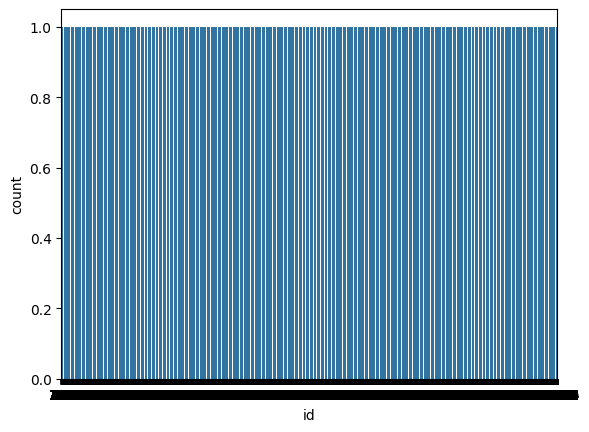

In [104]:
#sns.set_theme(style="whitegrid")

sns.countplot(y_train[target])
plt.show()
#y_train[target].value_counts().plot(kind = 'bar')
#sns.boxplot(x="Class", y="V6", data=equal_sample,  ax=axes[1,3])

In [122]:
print(x_test.shape,y_test.shape)

(158172, 21) (158172, 1)


In [123]:
x_train = x_train.astype('float')
x_test = x_test.astype('float')

## Performed feature normalization using z-score

In [124]:
for col in x_train.columns:
        encode_numeric_zscore(x_train,col)

for col in x_test.columns:
        encode_numeric_zscore(x_test,col)

In [125]:
label0 = y_train[y_train['label'] == 0].index.values
label1 = y_train[y_train['label'] == 1].index.values

min_rows = min(y_train['label'].value_counts())

np.random.shuffle(label0)
np.random.shuffle(label1)

index_shuffled_label0  = list(label0)
index_shuffled_label1  = list(label1)

indices_ = index_shuffled_label0[:min_rows] + index_shuffled_label1[:min_rows]


In [126]:
x_train.shape

(77015, 22)

In [127]:
x_train = x_train.loc[indices_, :]
y_train= y_train.loc[indices_,:]

In [128]:
print(x_train.shape, y_train.shape)

(73864, 22) (73864, 1)


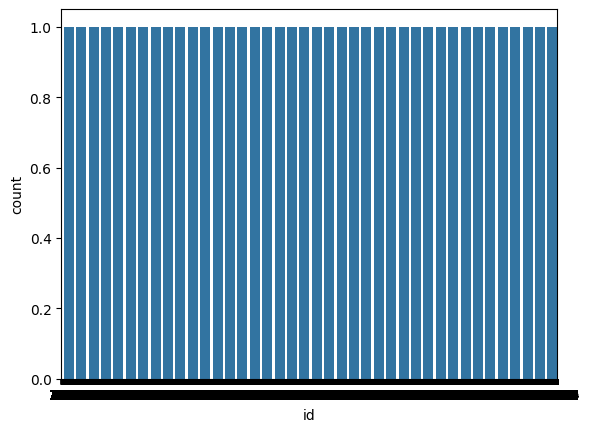

In [129]:
sns.countplot(y_train[target])
plt.show()
#y_train['label'].value_counts().plot(kind = 'bar')

In [130]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Logistic Regression

In [132]:
target = 'label'
features = [f for f in train_data.columns if f != target and f != 'OTHER']

x_train = train_data[features]
y_train = train_data[[target]]

x_test = test_data[features]
y_test = test_data[[target]]


In [133]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
log_clf = LogisticRegression()

# fit the model with data
log_clf.fit(x_train, y_train)

# predict the response for new observations
y_pred = log_clf.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 1099 54803]
 [ 4538 97732]]
Plotting confusion matrix


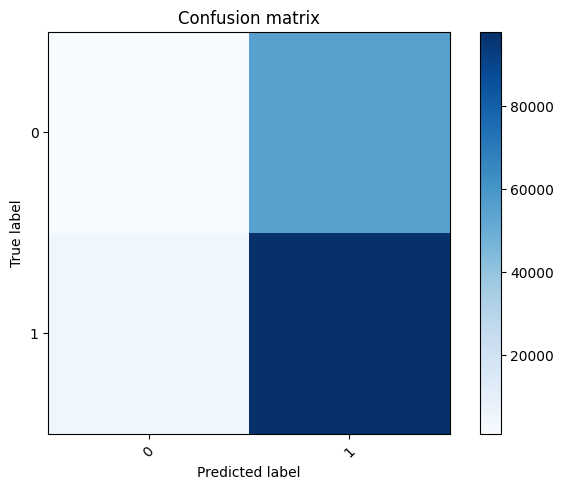

In [134]:
 from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import roc_curve, auc

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
classification = metrics.classification_report(y_test, y_pred)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(confusion_matrix, [0, 1])
plt.show()

In [135]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [136]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.19      0.02      0.04     55902
           1       0.64      0.96      0.77    102270

    accuracy                           0.62    158172
   macro avg       0.42      0.49      0.40    158172
weighted avg       0.48      0.62      0.51    158172



In [137]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
y_score=cross_val_predict(log_clf , x_train, y_train, cv=3)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [138]:
print("Precision : {}".format(precision_score(y_test, y_pred)))

Precision : 0.6407185236175305


In [139]:
print("Recall : {}".format(recall_score(y_test, y_pred)))


Recall : 0.9556272611714091


In [140]:
if y_score.ndim == 3:
    y_score = y_score[:, 1]

In [141]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_score)


In [142]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])




def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)





In [ ]:
"""import matplotlib.pyplot as plt
plot_precision_vs_recall(precisions, recalls)
plt.save_fig("precision_vs_recall_plot")
plt.show()
plt.figure(figsize=(8, 6))"""

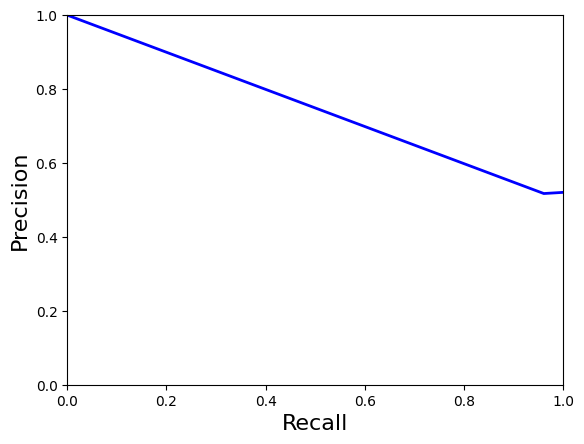

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [148]:
# Plotting precision vs recall
plot_precision_vs_recall(precisions, recalls)
plt.savefig("precision_vs_recall_plot.png")
plt.show()
plt.figure(figsize=(8, 6))


In [149]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_score)

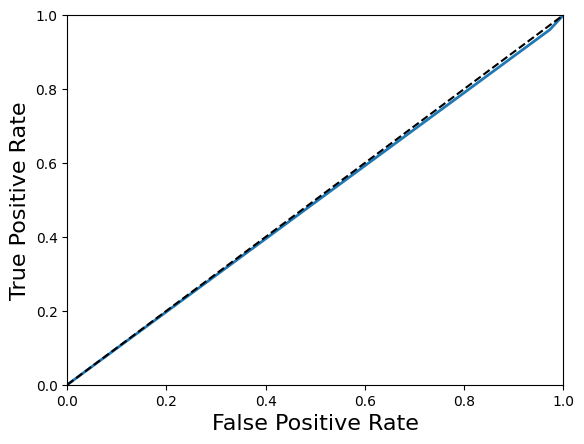

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [151]:
plot_roc_curve(fpr, tpr)
#save_fig("roc_curve_plot")
plt.savefig("roc_curve_plot")
plt.show()
plt.figure(figsize=(8, 6))

In [152]:
from sklearn.metrics import roc_auc_score

print("roc_score : {}".format(roc_auc_score(y_train, y_score)))

roc_score : 0.49384891811691545


In [153]:
from sklearn import svm

#create svm classifier
svm_clf = svm.SVC(kernel = 'rbf', gamma = 5.0,random_state=13,max_iter=1000)
svm_clf.fit(x_train,y_train)




/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(gamma=5.0, max_iter=1000, random_state=13)

In [154]:
y_pred=svm_clf.predict(x_test)

In [155]:
score = metrics.accuracy_score(y_test, y_pred)

print("Accuracy score: {}".format(score))

Accuracy score: 0.64185823028096


In [156]:
precision_score = metrics.precision_score(y_test, y_pred, average= "weighted")
print("Precision score: {}".format(precision_score))
recall_score = metrics.recall_score(y_test, y_pred, average= "weighted")
print("Recall score: {}".format(recall_score))
f1_score = metrics.f1_score(y_test, y_pred, average= "weighted")
print("F1 score: {}".format(f1_score))

Precision score: 0.5890101976795178
Recall score: 0.64185823028096
F1 score: 0.5556414325169938


In [157]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.10      0.16     55902
           1       0.66      0.94      0.77    102270

    accuracy                           0.64    158172
   macro avg       0.56      0.52      0.47    158172
weighted avg       0.59      0.64      0.56    158172



[[ 5352 50550]
 [ 6098 96172]]
Plotting confusion matrix


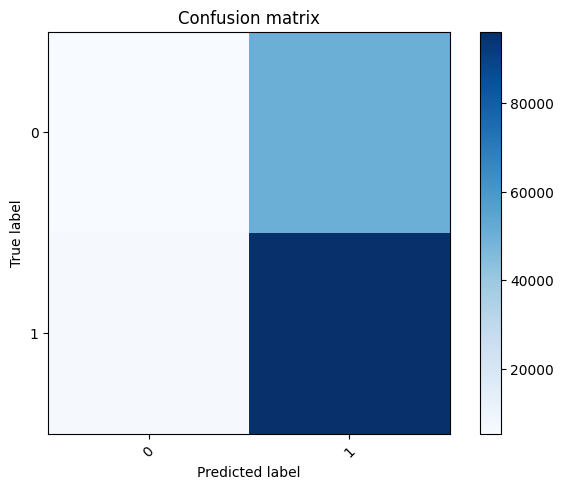

In [158]:
# Compute confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
classification = metrics.classification_report(y_test, y_pred)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(confusion_matrix, [0, 1])
plt.show()

In [159]:
from sklearn.metrics import precision_recall_curve

y_score=cross_val_predict(svm_clf , x_train, y_train, cv=3)
#precisions, recalls, thresholds = precision_recall_curve(y_train, score)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sk

In [160]:
if y_score.ndim == 3:
    y_score = y_score[:, 1]

In [161]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_score)

In [162]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_score)

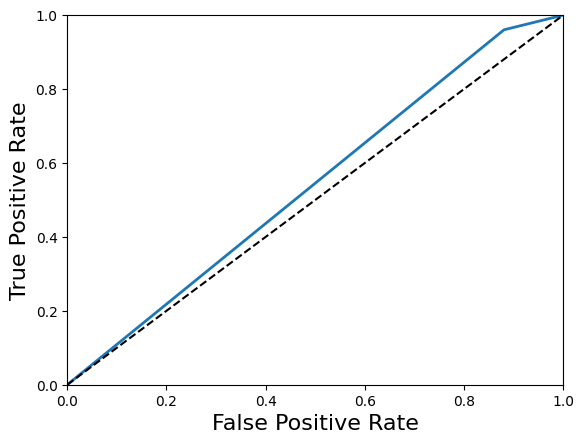

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [164]:
plot_roc_curve(fpr, tpr)
plt.savefig("roc_curve_plot")
plt.show()
plt.figure(figsize=(8, 6))

In [165]:
from sklearn.metrics import roc_auc_score

print("roc_score : {}".format(roc_auc_score(y_train, y_score)))

roc_score : 0.5398861436357962


In [166]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

# instantiate the model (using the value K=10)
knn_clf = KNeighborsClassifier()

# fit the model with data
knn_clf.fit(x_train, y_train)

# predict the response for new observations
y_pred = knn_clf.predict(x_test)

print(y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[1 1 1 ... 1 1 1]


In [167]:
precision_score = metrics.precision_score(y_test, y_pred, average= "weighted")
print("Precision score: {}".format(precision_score))
recall_score = metrics.recall_score(y_test, y_pred, average= "weighted")
print("Recall score: {}".format(recall_score))
f1_score = metrics.f1_score(y_test, y_pred, average= "weighted")
print("F1 score: {}".format(f1_score))

Precision score: 0.8605038090290841
Recall score: 0.8355524365880181
F1 score: 0.83891544518529


In [168]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.92      0.80     55902
           1       0.94      0.79      0.86    102270

    accuracy                           0.84    158172
   macro avg       0.83      0.85      0.83    158172
weighted avg       0.86      0.84      0.84    158172



[[51170  4732]
 [21279 80991]]
Plotting confusion matrix


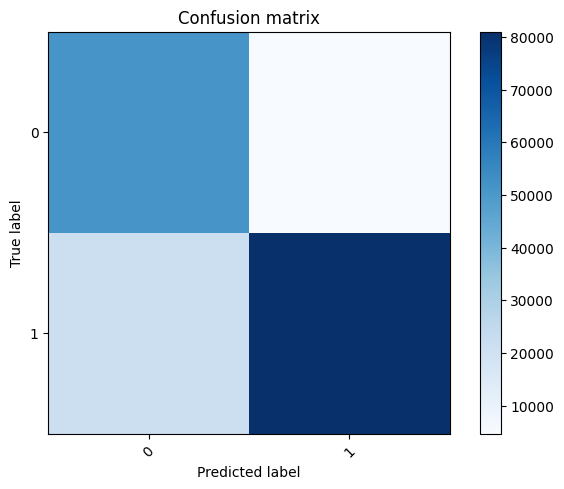

In [169]:
# Compute confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
classification = metrics.classification_report(y_test, y_pred)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(confusion_matrix, [0, 1])
plt.show()

In [170]:
from sklearn.metrics import precision_recall_curve

y_score=cross_val_predict(knn_clf , x_train, y_train, cv=3)
print(y_score)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[0 0 0 ... 0 0 0]


In [171]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_score)

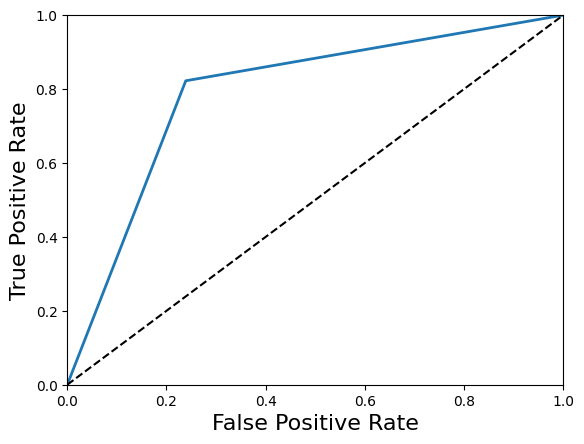

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [174]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_score)

plot_roc_curve(fpr, tpr)
plt.savefig("roc_curve_plot")
plt.show()
plt.figure(figsize=(8, 6))

In [175]:
from sklearn.metrics import roc_auc_score

print("roc_score : {}".format(roc_auc_score(y_train, y_score)))

roc_score : 0.7917350344969096


In [176]:
y_train_nn = pd.get_dummies(y_train['label'])
y_test = test_data.loc[:, ['label']]

In [177]:
y_test_nn = pd.get_dummies(y_test['label'])

In [178]:
print(x_train.shape, y_train_nn.shape)
print(x_test.shape,y_test_nn.shape)

(77015, 21) (77015, 2)
(158172, 21) (158172, 2)


## Fully-Connected Neural Network
### 1) Neural Network with Relu as Activation function and Adam as Optimizer

In [184]:
#import io, requests, os, h5py, shutill
import io, requests, os, h5py, shutil

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path = '/Users/moksh/CSUS/CSC215/Project_1/model_weight.hdf5'

model = Sequential()

#Tuning Hyperparameters to achieve best model and to improve performance
model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(y_train_nn.shape[1],activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

model_checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss',verbose=1,save_best_only=False,save_weights_only=False, mode='auto') # save best model

model.fit(x_train, y_train_nn, validation_data=(x_test,y_test_nn), callbacks=[monitor, model_checkpoint], verbose=2, epochs=50)

model.load_weights(checkpoint_path) # load weights from best model
model.save(checkpoint_path)

Epoch 1/50

Epoch 1: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight.hdf5
2407/2407 - 22s - loss: 22276.7559 - accuracy: 0.5437 - val_loss: 2367.2026 - val_accuracy: 0.6635 - 22s/epoch - 9ms/step
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight.hdf5
2407/2407 - 18s - loss: 9188.0654 - accuracy: 0.5659 - val_loss: 1716.0082 - val_accuracy: 0.5614 - 18s/epoch - 7ms/step
Epoch 3/50

Epoch 3: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight.hdf5
2407/2407 - 18s - loss: 2806.2839 - accuracy: 0.5756 - val_loss: 11.2921 - val_accuracy: 0.7950 - 18s/epoch - 7ms/step
Epoch 4/50

Epoch 4: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight.hdf5
2407/2407 - 16s - loss: 1748.1100 - accuracy: 0.6083 - val_loss: 742.5493 - val_accuracy: 0.5809 - 16s/epoch - 7ms/step
Epoch 5/50

Epoch 5: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight.hdf5
2407/2407 - 16s - loss: 1881.9427 - accuracy: 0.6166 - val_loss: 3.3466 - val_accuracy: 0.7259 - 16s/epoch - 7ms/step
Epoch 6/50

Epoch 6: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight.hdf5
2407/2407 - 18s - loss: 717.4907 - accuracy: 0.5968 - val_loss: 2.1354 - val_accura

In [185]:
y_pred = model.predict(x_test)
print(y_pred)

4943/4943 [==============================] - 9s 2ms/step
[[0.47278905 0.52721095]
 [0.47278905 0.52721095]
 [0.47278905 0.52721095]
 ...
 [0.47278905 0.52721095]
 [0.47278905 0.52721095]
 [0.47278905 0.52721095]]


In [186]:
y_pred = np.argmax(y_pred,axis=1) # raw probabilities to choose class (highest probability)
print(y_pred)


[1 1 1 ... 1 1 1]


In [187]:
y_test_nn

,0,1
id,,
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
...,...,...
175337,0,1
175338,0,1
175339,0,1


In [188]:
precision_score = metrics.precision_score(y_test, y_pred, average= "weighted")
print("Precision score: {}".format(precision_score))
recall_score = metrics.recall_score(y_test, y_pred, average= "weighted")
print("Recall score: {}".format(recall_score))
f1_score = metrics.f1_score(y_test, y_pred, average= "weighted")
print("F1 score: {}".format(f1_score))

Precision score: 0.780764585561623
Recall score: 0.6682914801608376
F1 score: 0.5554982359838617


In [189]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.06      0.12     55902
           1       0.66      1.00      0.80    102270

    accuracy                           0.67    158172
   macro avg       0.83      0.53      0.46    158172
weighted avg       0.78      0.67      0.56    158172



[[  3435  52467]
 [     0 102270]]
Plotting confusion matrix


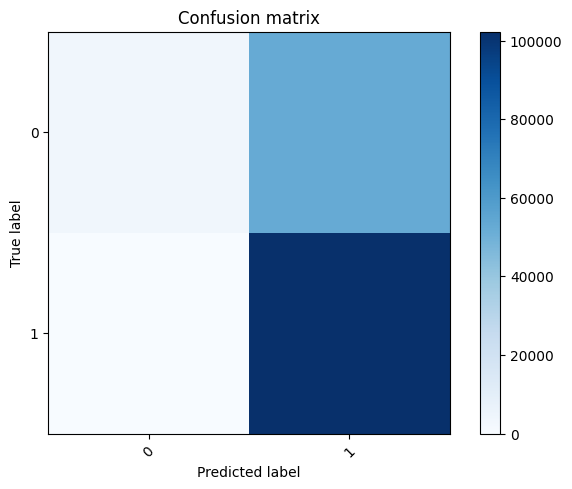

In [190]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
classification = metrics.classification_report(y_test, y_pred)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(confusion_matrix, [0, 1])
plt.show()

In [191]:
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

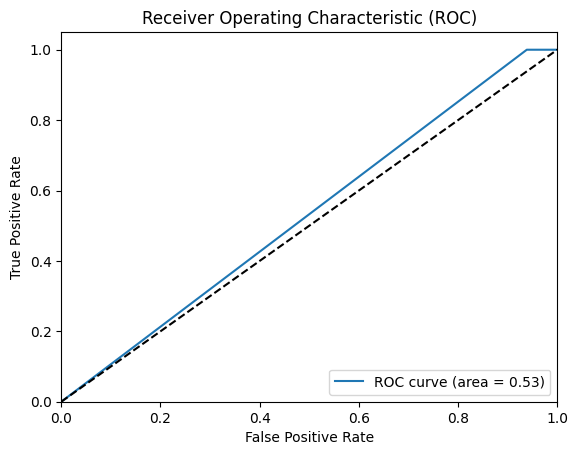

In [192]:
plot_roc(y_pred, y_test)

### 2) Neural Network with Sigmoid as Activation function and sgd as Optimizer

In [193]:
import io
import requests
import os
import h5py
import shutil
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path = '/Users/moksh/CSUS/CSC215/Project_1/model_weight2.hdf5'

model = Sequential()

#Tuning Hyperparameters to achieve best model and to improve performance
model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(16,activation='sigmoid'))
model.add(Dense(8,activation='sigmoid'))
model.add(Dense(y_train_nn.shape[1],activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

model_checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss',verbose=1,save_best_only=False,save_weights_only=False, mode='auto') # save best model

model.fit(x_train, y_train_nn, validation_data=(x_test,y_test_nn), callbacks=[monitor, model_checkpoint], verbose=2, epochs=50)

model.load_weights(checkpoint_path) # load weights from best model
model.save(checkpoint_path)

Epoch 1/50

Epoch 1: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight2.hdf5
2407/2407 - 19s - loss: 0.6942 - accuracy: 0.5220 - val_loss: 0.6806 - val_accuracy: 0.6602 - 19s/epoch - 8ms/step
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight2.hdf5
2407/2407 - 17s - loss: 0.6911 - accuracy: 0.5361 - val_loss: 0.6854 - val_accuracy: 0.6644 - 17s/epoch - 7ms/step
Epoch 3/50

Epoch 3: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight2.hdf5
2407/2407 - 17s - loss: 0.6900 - accuracy: 0.5382 - val_loss: 0.6862 - val_accuracy: 0.6637 - 17s/epoch - 7ms/step
Epoch 4/50

Epoch 4: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight2.hdf5
2407/2407 - 17s - loss: 0.6890 - accuracy: 0.5382 - val_loss: 0.6700 - val_accuracy: 0.6644 - 17s/epoch - 7ms/step
Epoch 5/50

Epoch 5: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight2.hdf5
2407/2407 - 27s - loss: 0.6878 - accuracy: 0.5386 - val_loss: 0.6834 - val_accuracy: 0.6649 - 27s/epoch - 11ms/step
Epoch 6/50

Epoch 6: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight2.hdf5
2407/2407 - 17s - loss: 0.6890 - accuracy: 0.5367 - val_loss: 0.6759 - val_accuracy: 0.6633 - 1

In [194]:
y_pred = model.predict(x_test)
print(y_pred)

4943/4943 [==============================] - 8s 2ms/step
[[0.47714236 0.5228576 ]
 [0.47714236 0.5228576 ]
 [0.47714236 0.5228576 ]
 ...
 [0.47714236 0.5228576 ]
 [0.47714236 0.5228576 ]
 [0.47714236 0.5228576 ]]


In [195]:
y_pred = np.argmax(y_pred,axis=1) # raw probabilities to choose class (highest probability)
print(y_pred)

[1 1 1 ... 1 1 1]


In [196]:
y_test_nn

,0,1
id,,
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
...,...,...
175337,0,1
175338,0,1
175339,0,1


In [197]:
precision_score = metrics.precision_score(y_test, y_pred, average= "weighted")
print("Precision score: {}".format(precision_score))
recall_score = metrics.recall_score(y_test, y_pred, average= "weighted")
print("Recall score: {}".format(recall_score))
f1_score = metrics.f1_score(y_test, y_pred, average= "weighted")
print("F1 score: {}".format(f1_score))

Precision score: 0.7423390067001797
Recall score: 0.6650102420150216
F1 score: 0.5523763649128455


In [198]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.06      0.11     55902
           1       0.66      1.00      0.79    102270

    accuracy                           0.67    158172
   macro avg       0.78      0.53      0.45    158172
weighted avg       0.74      0.67      0.55    158172



[[  3309  52593]
 [   393 101877]]
Plotting confusion matrix


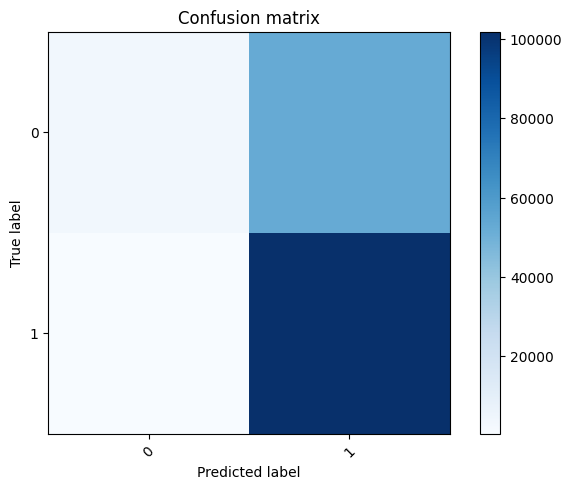

In [199]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
classification = metrics.classification_report(y_test, y_pred)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(confusion_matrix, [0, 1])
plt.show()

In [200]:
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

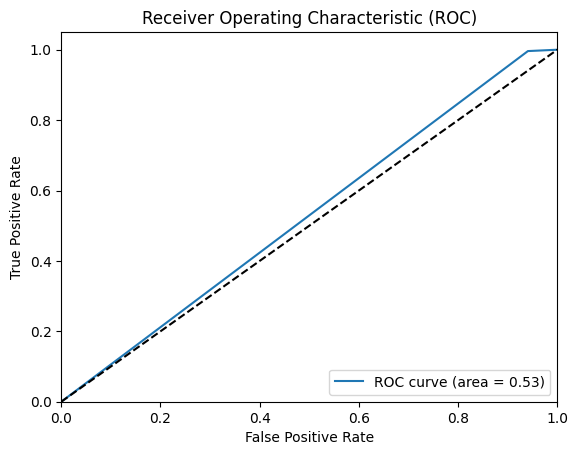

In [201]:
plot_roc(y_pred, y_test)

### 3) Neural Network with tanh as Activation function and sgd as Optimizer

In [202]:
import io
import requests
import os
import h5py
import shutil
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path = '/Users/moksh/CSUS/CSC215/Project_1/model_weight3.hdf5'

model = Sequential()

#Tuning Hyperparameters to achieve best model and to improve performance
model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(16,activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(y_train_nn.shape[1],activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

model_checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss',verbose=1,save_best_only=False,save_weights_only=False, mode='auto') # save best model

model.fit(x_train, y_train_nn, validation_data=(x_test,y_test_nn), callbacks=[monitor, model_checkpoint], verbose=2, epochs=10)

model.load_weights(checkpoint_path) # load weights from best model
model.save(checkpoint_path)


Epoch 1/10

Epoch 1: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight3.hdf5
2407/2407 - 18s - loss: 0.6844 - accuracy: 0.5351 - val_loss: 0.6691 - val_accuracy: 0.6668 - 18s/epoch - 8ms/step
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight3.hdf5
2407/2407 - 16s - loss: 0.6823 - accuracy: 0.5366 - val_loss: 0.6667 - val_accuracy: 0.6670 - 16s/epoch - 7ms/step
Epoch 3/10

Epoch 3: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight3.hdf5
2407/2407 - 16s - loss: 0.6842 - accuracy: 0.5304 - val_loss: 0.6815 - val_accuracy: 0.6647 - 16s/epoch - 7ms/step
Epoch 4/10

Epoch 4: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight3.hdf5
2407/2407 - 17s - loss: 0.6853 - accuracy: 0.5306 - val_loss: 0.6825 - val_accuracy: 0.6642 - 17s/epoch - 7ms/step
Epoch 5/10

Epoch 5: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight3.hdf5
2407/2407 - 16s - loss: 0.6847 - accuracy: 0.5295 - val_loss: 0.6676 - val_accuracy: 0.6634 - 16s/epoch - 7ms/step
Epoch 6/10

Epoch 6: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight3.hdf5
2407/2407 - 16s - loss: 0.6850 - accuracy: 0.5294 - val_loss: 0.6721 - val_accuracy: 0.6633 - 16

In [203]:
y_pred = model.predict(x_test)
print(y_pred)

4943/4943 [==============================] - 8s 2ms/step
[[0.43943244 0.56056756]
 [0.43943244 0.56056756]
 [0.43943244 0.56056756]
 ...
 [0.43943244 0.56056756]
 [0.43943244 0.56056756]
 [0.43943244 0.56056756]]


In [204]:
y_pred = np.argmax(y_pred,axis=1) # raw probabilities to choose class (highest probability)
print(y_pred)

[1 1 1 ... 1 1 1]


In [205]:
precision_score = metrics.precision_score(y_test, y_pred, average= "weighted")
print("Precision score: {}".format(precision_score))
recall_score = metrics.recall_score(y_test, y_pred, average= "weighted")
print("Recall score: {}".format(recall_score))
f1_score = metrics.f1_score(y_test, y_pred, average= "weighted")
print("F1 score: {}".format(f1_score))


Precision score: 0.7749841814893981
Recall score: 0.6631262170295628
F1 score: 0.5448392100747924


In [206]:
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.05      0.09     55902
           1       0.66      1.00      0.79    102270

    accuracy                           0.66    158172
   macro avg       0.82      0.52      0.44    158172
weighted avg       0.77      0.66      0.54    158172



In [207]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
classification = metrics.classification_report(y_test, y_pred)
print('Plotting confusion matrix')

[[  2645  53257]
 [    27 102243]]
Plotting confusion matrix


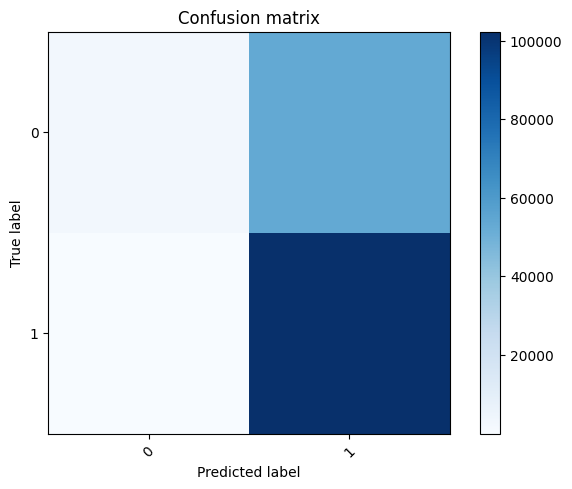

In [208]:
plt.figure()
plot_confusion_matrix(confusion_matrix, [0, 1])
plt.show()

In [209]:
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

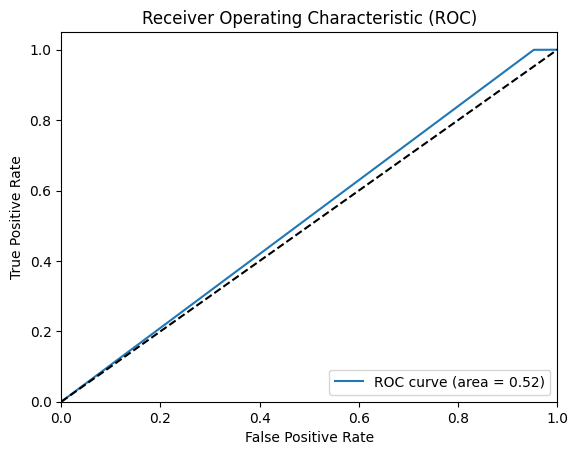

In [210]:
plot_roc(y_pred, y_test)

### 4) Neural Network with tanh as Activation function and Adam as Optimizer

In [211]:
import io
import requests
import os
import h5py
import shutil
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path = '/Users/moksh/CSUS/CSC215/Project_1/model_weight4.hdf5'

model = Sequential()

#Tuning Hyperparameters to achieve best model and to improve performance
model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(16,activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(y_train_nn.shape[1],activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

model_checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss',verbose=1,save_best_only=False,save_weights_only=False, mode='auto') # save best model

model.fit(x_train, y_train_nn, validation_data=(x_test,y_test_nn), callbacks=[monitor, model_checkpoint], verbose=2, epochs=10)

model.load_weights(checkpoint_path) # load weights from best model
model.save(checkpoint_path)


Epoch 1/10

Epoch 1: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight4.hdf5
2407/2407 - 18s - loss: 0.6844 - accuracy: 0.5315 - val_loss: 0.6574 - val_accuracy: 0.6674 - 18s/epoch - 8ms/step
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight4.hdf5
2407/2407 - 16s - loss: 0.6804 - accuracy: 0.5337 - val_loss: 0.6499 - val_accuracy: 0.6680 - 16s/epoch - 7ms/step
Epoch 3/10

Epoch 3: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight4.hdf5
2407/2407 - 17s - loss: 0.6813 - accuracy: 0.5353 - val_loss: 0.6830 - val_accuracy: 0.3557 - 17s/epoch - 7ms/step
Epoch 4/10

Epoch 4: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight4.hdf5
2407/2407 - 17s - loss: 0.6820 - accuracy: 0.5344 - val_loss: 0.6603 - val_accuracy: 0.6660 - 17s/epoch - 7ms/step
Epoch 5/10

Epoch 5: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight4.hdf5
2407/2407 - 17s - loss: 0.6811 - accuracy: 0.5337 - val_loss: 0.6816 - val_accuracy: 0.3571 - 17s/epoch - 7ms/step
Epoch 6/10

Epoch 6: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight4.hdf5
2407/2407 - 17s - loss: 0.6807 - accuracy: 0.5368 - val_loss: 0.6606 - val_accuracy: 0.6673 - 17

In [212]:
y_pred = model.predict(x_test)
print(y_pred)

4943/4943 [==============================] - 8s 2ms/step
[[0.45276225 0.5472378 ]
 [0.45276225 0.5472378 ]
 [0.45276225 0.5472378 ]
 ...
 [0.45276225 0.5472378 ]
 [0.45276225 0.5472378 ]
 [0.45276225 0.5472378 ]]


In [213]:
y_pred = np.argmax(y_pred,axis=1) # raw probabilities to choose class (highest probability)
print(y_pred)


[1 1 1 ... 1 1 1]


In [214]:
precision_score = metrics.precision_score(y_test, y_pred, average= "weighted")
print("Precision score: {}".format(precision_score))
recall_score = metrics.recall_score(y_test, y_pred, average= "weighted")
print("Recall score: {}".format(recall_score))
f1_score = metrics.f1_score(y_test, y_pred, average= "weighted")
print("F1 score: {}".format(f1_score))


Precision score: 0.7414626297310029
Recall score: 0.6659522545077511
F1 score: 0.5547060225797978


In [215]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.06      0.12     55902
           1       0.66      1.00      0.79    102270

    accuracy                           0.67    158172
   macro avg       0.78      0.53      0.46    158172
weighted avg       0.74      0.67      0.55    158172



In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
classification = metrics.classification_report(y_test, y_pred)
print('Plotting confusion matrix')

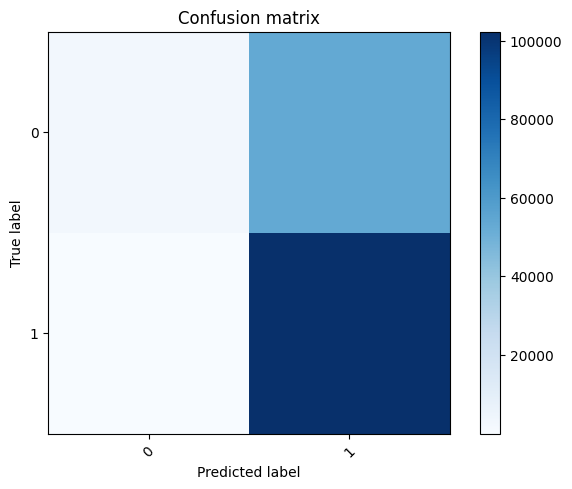

In [216]:
plt.figure()
plot_confusion_matrix(confusion_matrix, [0, 1])
plt.show()

In [217]:
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()


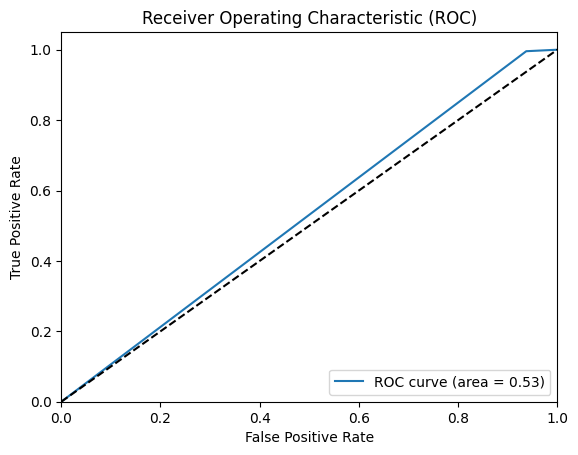

In [218]:
plot_roc(y_pred, y_test)

## Additional Features

In [221]:
import pandas as pd
train_data = pd.read_csv("/content/drive/MyDrive/Network-Intrusion-Detection dataSet/UNSW_NB15_training-set.csv", index_col='id')
test_data = pd.read_csv("/content/drive/MyDrive/Network-Intrusion-Detection dataSet/UNSW_NB15_testing-set.csv", index_col='id')

In [222]:
#sort by dtype, we'll mostly treat the numerics the same though

discrete_vars=['dur','spkts','dpkts','sbytes','dbytes','sttl','dttl','sloss','dloss','swin',
               'smean','dmean','trans_depth','response_body_len','ct_srv_src','ct_state_ttl',
               'ct_dst_ltm','ct_dst_sport_ltm','ct_dst_src_ltm','is_ftp_login','ct_ftp_cmd',
               'ct_flw_http_mthd','ct_src_ltm','ct_srv_dst','is_sm_ips_ports']
continuous_vars=['rate','sload','dload','sinpkt','dinpkt', 'sjit','djit','synack','ackdat']
categorical_vars=['proto','state','attack_cat''stcpb','dtcpb', 'tcprtt']
dep_var=['label']


In [223]:
train_data.loc[:, dep_var + discrete_vars + continuous_vars].describe()

,label,dur,spkts,dpkts,sbytes,dbytes,sttl,dttl,sloss,dloss,...,is_sm_ips_ports,rate,sload,dload,sinpkt,dinpkt,sjit,djit,synack,ackdat
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,...,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.000000,82332.000000
mean,0.550600,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,180.967667,95.713003,4.753692,6.308556,...,0.011126,8.241089e+04,6.454902e+07,6.305470e+05,755.394301,121.701284,6.363075e+03,535.180430,0.029256,0.026669
std,0.497436,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,101.513358,116.667722,64.649620,55.708021,...,0.104891,1.486204e+05,1.798618e+08,2.393001e+06,6182.615732,1292.378499,5.672402e+04,3635.305383,0.070854,0.055094
min,0.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,62.000000,0.000000,0.000000,0.000000,...,0.000000,2.860611e+01,1.120247e+04,0.000000e+00,0.008000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,1.000000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,254.000000,29.000000,1.000000,0.000000,...,0.000000,2.650177e+03,5.770032e+05,2.112951e+03,0.557929,0.010000,1.762392e+01,0.000000,0.000441,0.000080
75%,1.000000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,254.000000,252.000000,3.000000,2.000000,...,0.000000,1.111111e+05,6.514286e+07,1.585808e+04,63.409444,63.136369,3.219332e+03,128.459914,0.052596,0.048816
max,1.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,255.000000,253.000000,5319.000000,5507.000000,...,1.000000,1.000000e+06,5.268000e+09,2.082111e+07,60009.992000,57739.240000,1.483831e+06,463199.240100,3.226788,2.928778


<ipython-input-224-687be45568a2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['label'])


<Axes: xlabel='label', ylabel='Density'>

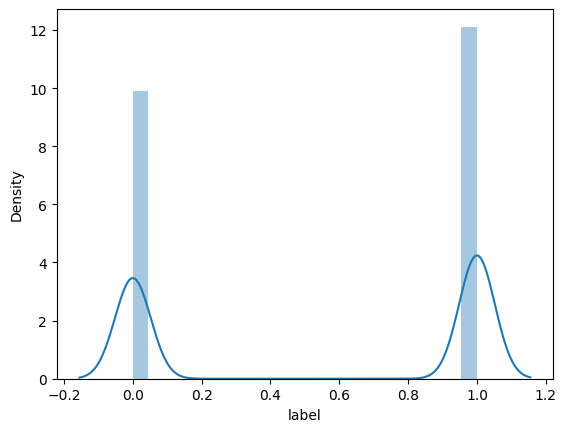

In [224]:
sns.distplot(train_data['label'])

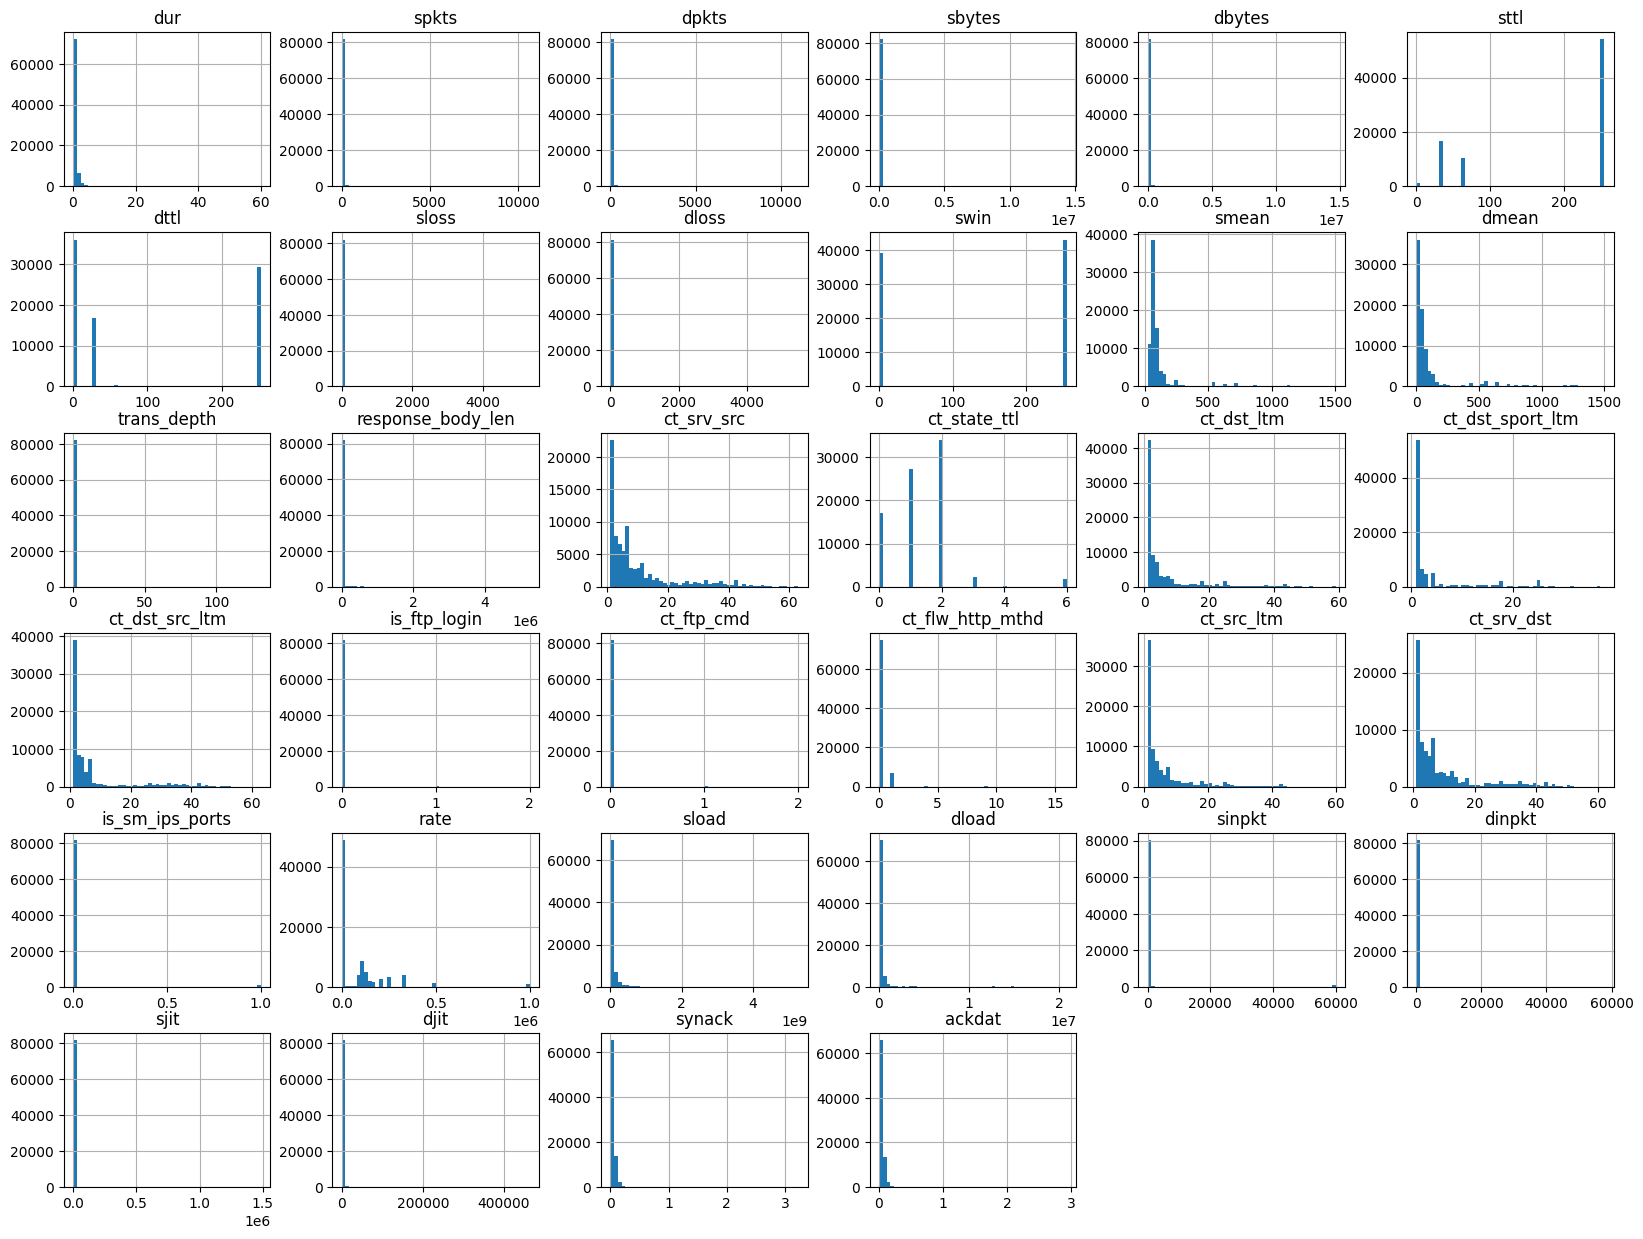

In [225]:
train_data.loc[:, discrete_vars + continuous_vars].hist(bins=50, figsize=(20,15))
plt.show()

In [226]:
d = {'INT':'INT', 'FIN':'FIN', 'CON':'CON', 'ECO':'OTHER', 'REQ':'REQ', 'RST':'RST', 'PAR':'OTHER', 'URN':'OTHER', 'no':'OTHER', 'ACC':'OTHER', 'CLO':'OTHER'}
train_data['state'] = train_data['state'].map(lambda s: d[s])

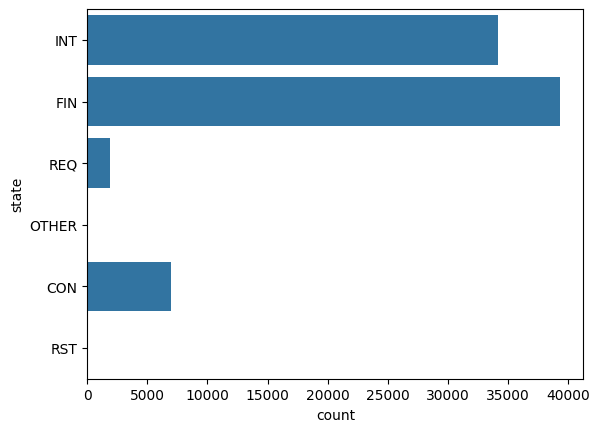

In [227]:
sns.countplot(train_data['state'])
plt.show()

In [228]:
most_occured = ['tcp', 'udp', 'unas']
def encoding_categoricals(column):
    if column in most_occured:
        return column
    else:
        return "other"

In [229]:
train_data['proto'] = train_data['proto'].apply(encoding_categoricals)

test_data['proto'] = test_data['proto'].apply(encoding_categoricals)

In [232]:
d = {'INT': 'INT', 'FIN': 'FIN', 'CON': 'CON', 'REQ': 'REQ', 'RST': 'RST', 'ACC': 'OTHER', 'CLO': 'OTHER', 'PAR': 'OTHER', 'URN': 'OTHER', 'no': 'OTHER'}

# Use the get method with a default value of 'OTHER' for keys not in the dictionary
test_data['state'] = test_data['state'].map(lambda s: d.get(s, 'OTHER'))


In [233]:
"""d = {'INT':'INT', 'FIN':'FIN', 'CON':'CON', 'REQ':'REQ', 'RST':'RST', 'ACC':'OTHER', 'CLO':'OTHER','PAR':'OTHER', 'URN':'OTHER', 'no':'OTHER'}
test_data['state'] = test_data['state'].map(lambda s: d[s])"""

"d = {'INT':'INT', 'FIN':'FIN', 'CON':'CON', 'REQ':'REQ', 'RST':'RST', 'ACC':'OTHER', 'CLO':'OTHER','PAR':'OTHER', 'URN':'OTHER', 'no':'OTHER'}\ntest_data['state'] = test_data['state'].map(lambda s: d[s])"

In [234]:
most_occured = ['INT', 'FIN', 'CON', 'REQ']

train_data = train_data[train_data['state'].isin(most_occured)]

test_data = test_data[test_data['state'].isin(most_occured)]

In [235]:
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [236]:
encode_text_dummy(train_data,"proto")
encode_text_dummy(train_data,"state")

encode_text_dummy(test_data,"proto")
encode_text_dummy(test_data,"state")

In [237]:
train_data.drop(['swin','service','label', 'spkts', 'dinpkt', 'sjit', 'djit', 'response_body_len'],axis = 1, inplace = True)

In [238]:
test_data.drop(['swin','service','label', 'spkts', 'dinpkt', 'sjit', 'djit', 'response_body_len'],axis = 1, inplace = True)

In [239]:
test_data.shape[1]

42

In [240]:
train_data.shape[1]

42

In [241]:
print('Number of missing values:')
[(x, y) for x, y in zip(test_data.isna().sum(), test_data.isna().sum().index) if x > 0]

Number of missing values:


[]

In [242]:
train_data=train_data.replace('-',np.nan)
for column in train_data.columns:
    print('\t%s: %d'%(column,train_data[column].isnull().sum()))

	dur: 0
	dpkts: 0
	sbytes: 0
	dbytes: 0
	rate: 0
	sttl: 0
	dttl: 0
	sload: 0
	dload: 0
	sloss: 0
	dloss: 0
	sinpkt: 0
	stcpb: 0
	dtcpb: 0
	dwin: 0
	tcprtt: 0
	synack: 0
	ackdat: 0
	smean: 0
	dmean: 0
	trans_depth: 0
	ct_srv_src: 0
	ct_state_ttl: 0
	ct_dst_ltm: 0
	ct_src_dport_ltm: 0
	ct_dst_sport_ltm: 0
	ct_dst_src_ltm: 0
	is_ftp_login: 0
	ct_ftp_cmd: 0
	ct_flw_http_mthd: 0
	ct_src_ltm: 0
	ct_srv_dst: 0
	is_sm_ips_ports: 0
	attack_cat: 0
	proto-other: 0
	proto-tcp: 0
	proto-udp: 0
	proto-unas: 0
	state-CON: 0
	state-FIN: 0
	state-INT: 0
	state-REQ: 0


In [243]:
from sklearn import preprocessing
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

In [244]:
encode_text_index(train_data,"attack_cat")
encode_text_index(test_data,"attack_cat")

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Shellcode', 'Worms'], dtype=object)

In [245]:
x_train = train_data.drop(['attack_cat'], axis = 1)
y_train = train_data.loc[:, ['attack_cat']]

x_test = test_data.drop(['attack_cat'], axis = 1)
y_test = test_data.loc[:, ['attack_cat']]


In [246]:
x_train = x_train.astype('float')
x_test = x_test.astype('float')
for col in x_train.columns:
        encode_numeric_zscore(x_train,col)

for col in x_test.columns:
        encode_numeric_zscore(x_test,col)


In [247]:
target = 'attack_cat'
features = list(train_data.columns)
features = [f for f in features if f!=target]

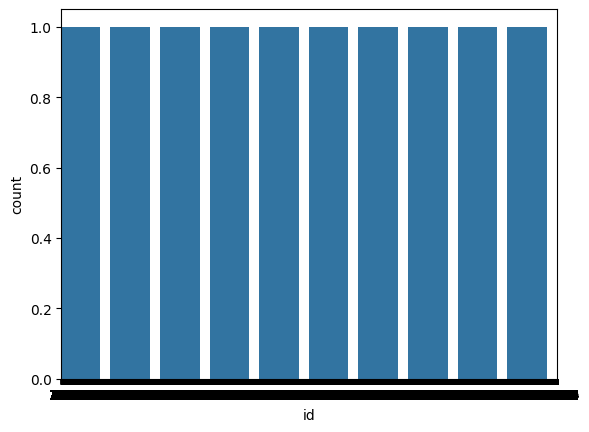

In [248]:
sns.countplot(y_train[target])
plt.show()

In [249]:
y_train= pd.get_dummies(y_train[target])
y_test = test_data.loc[:, ['attack_cat']]
print(x_train.shape, y_train.shape)

(82326, 41) (82326, 10)


In [250]:
y_test = pd.get_dummies(y_test[target])

print(x_test.shape, y_test.shape)

(175243, 41) (175243, 10)


- #### Most correlated features are :

#### spkts, sbytes, sloss, dpkts, dbytes, dloss, sinpkt, is_sm_ips_ports, swin, dwin, tcprtt, synack, ct_srv_src, ct_srv_dst, ct_dst_src_ltm, ct_src_dport_ltm, ct_dst_sport_ltm, is_ftp_login ct_ftp_cmd

In [251]:
import io
import requests
import os
import h5py
import shutil
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path = '/Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5'

model = Sequential()

#Tuning Hyperparameters to achieve best model and to improve performance
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(y_train.shape[1],activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

model_checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss',verbose=1,save_best_only=False,save_weights_only=False, mode='auto') # save best model

model.fit(x_train, y_train, validation_data=(x_test,y_test), callbacks=[monitor, model_checkpoint], verbose=2, epochs=100)

model.load_weights(checkpoint_path) # load weights from best model
model.save(checkpoint_path)

Epoch 1/100

Epoch 1: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5
2573/2573 - 29s - loss: 0.6023 - accuracy: 0.7911 - val_loss: 0.7838 - val_accuracy: 0.7217 - 29s/epoch - 11ms/step
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5
2573/2573 - 19s - loss: 0.4687 - accuracy: 0.8313 - val_loss: 0.7383 - val_accuracy: 0.7453 - 19s/epoch - 7ms/step
Epoch 3/100

Epoch 3: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5
2573/2573 - 18s - loss: 0.4436 - accuracy: 0.8381 - val_loss: 0.7767 - val_accuracy: 0.7409 - 18s/epoch - 7ms/step
Epoch 4/100

Epoch 4: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5
2573/2573 - 28s - loss: 0.4293 - accuracy: 0.8423 - val_loss: 0.7528 - val_accuracy: 0.7472 - 28s/epoch - 11ms/step
Epoch 5/100

Epoch 5: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5
2573/2573 - 28s - loss: 0.4182 - accuracy: 0.8459 - val_loss: 0.7699 - val_accuracy: 0.7494 - 28s/epoch - 11ms/step
Epoch 6/100

Epoch 6: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5
2573/2573 - 19s - loss: 0.4117 - accuracy: 0.8474 - val_loss: 0.7666 - val_accuracy: 0.756

In [252]:
pred = model.predict(x_test)
print(pred[0])

5477/5477 [==============================] - 10s 2ms/step
[2.0751290e-09 1.4904095e-03 1.0453650e-02 6.4705119e-02 4.6384535e-05
 7.3845687e-05 7.1339385e-04 9.2106199e-01 1.3832990e-03 7.1997536e-05]


In [253]:
pred = np.argmax(pred,axis=1) # raw probabilities to choose class (highest probability)
print(pred)

[7 3 3 ... 5 5 5]


In [254]:
y_test = np.argmax(y_test.values, axis = 1)
print(y_test)

[6 6 6 ... 5 5 5]


In [255]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2000
           1       0.00      0.00      0.00      1746
           2       0.34      0.51      0.41     12262
           3       0.66      0.68      0.67     33386
           4       0.52      0.39      0.44     18184
           5       0.97      0.98      0.97     39999
           6       0.84      0.91      0.88     55914
           7       0.79      0.53      0.64     10489
           8       0.54      0.26      0.35      1133
           9       0.00      0.00      0.00       130

    accuracy                           0.75    175243
   macro avg       0.47      0.43      0.44    175243
weighted avg       0.74      0.75      0.74    175243



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [256]:
def confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[    0     0   903   749    12     0   336     0     0     0]
 [    3     0   948   615   109    14    34    23     0     0]
 [    5     0  6228  5239   279    82   215   162    52     0]
 [   18     0  8080 22715  1360   301   609   240    63     0]
 [    0     0   907  1121  7086   550  7912   500   108     0]
 [    0     0   186   466    69 39164    52    50    12     0]
 [    5     6    21   781  3484   370 51022   206    19     0]
 [    0     0  1182  2160  1175    11   366  5595     0     0]
 [    0     0     0   286   165    17    67   301   297     0]
 [    0     0     2    85     5    25     6     3     4     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Plotting confusion matrix


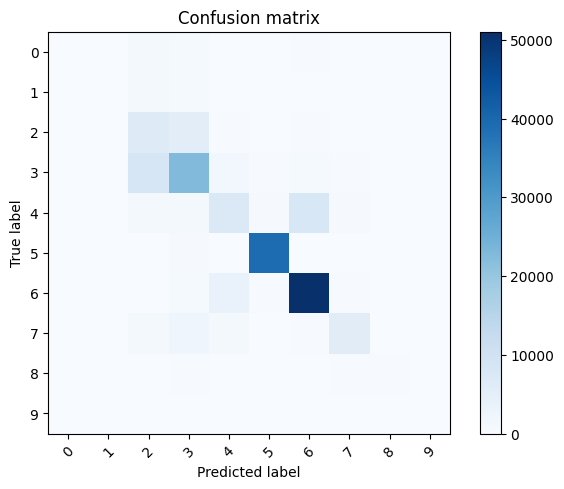

In [257]:
confusion_matrix = metrics.confusion_matrix(y_test, pred)
print(confusion_matrix)
classification = metrics.classification_report(y_test, pred)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(confusion_matrix, [0, 1, 2, 3, 4, 5, 6 ,7 ,8, 9])
plt.show()

## Top features


In [259]:
import pandas as pd
import sys, os, time, warnings


import seaborn as sns
import pandas as pd



train_data = pd.read_csv("/content/drive/MyDrive/Network-Intrusion-Detection dataSet/UNSW_NB15_training-set.csv", index_col='id')
test_data = pd.read_csv("/content/drive/MyDrive/Network-Intrusion-Detection dataSet/UNSW_NB15_testing-set.csv", index_col='id')

In [260]:
train_data_copy=train_data
test_data_copy=test_data

In [261]:
discrete_vars=['dur','spkts','dpkts','sbytes','dbytes','sttl','dttl','sloss','dloss','swin',
               'smean','dmean','trans_depth','response_body_len','ct_srv_src','ct_state_ttl',
               'ct_dst_ltm','ct_dst_sport_ltm','ct_dst_src_ltm','is_ftp_login','ct_ftp_cmd',
               'ct_flw_http_mthd','ct_src_ltm','ct_srv_dst','is_sm_ips_ports']
continuous_vars=['rate','sload','dload','sinpkt','dinpkt', 'sjit','djit','synack','ackdat']
categorical_vars=['proto','state','attack_cat''stcpb','dtcpb', 'tcprtt']
dep_var=['label']

In [262]:
most_occured = ['tcp', 'udp', 'unas']
def encoding_categoricals(column):
    if column in most_occured:
        return column
    else:
        return "other"

In [263]:
train_data['proto'] = train_data['proto'].apply(encoding_categoricals)

test_data['proto'] = test_data['proto'].apply(encoding_categoricals)

In [265]:
d = {'INT': 'INT', 'FIN': 'FIN', 'CON': 'CON', 'REQ': 'REQ', 'RST': 'RST', 'ACC': 'OTHER', 'CLO': 'OTHER', 'PAR': 'OTHER', 'URN': 'OTHER', 'no': 'OTHER'}

# Use the get method with a default value of 'OTHER' for keys not in the dictionary
test_data['state'] = test_data['state'].map(lambda s: d.get(s, 'OTHER'))


In [266]:
"""d = {'INT':'INT', 'FIN':'FIN', 'CON':'CON', 'REQ':'REQ', 'RST':'RST', 'ACC':'OTHER', 'CLO':'OTHER','PAR':'OTHER', 'URN':'OTHER', 'no':'OTHER'}
test_data['state'] = test_data['state'].map(lambda s: d[s])"""

"d = {'INT':'INT', 'FIN':'FIN', 'CON':'CON', 'REQ':'REQ', 'RST':'RST', 'ACC':'OTHER', 'CLO':'OTHER','PAR':'OTHER', 'URN':'OTHER', 'no':'OTHER'}\ntest_data['state'] = test_data['state'].map(lambda s: d[s])"

In [267]:
most_occured = ['INT', 'FIN', 'CON', 'REQ']

train_data = train_data[train_data['state'].isin(most_occured)]

test_data = test_data[test_data['state'].isin(most_occured)]

In [268]:
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [269]:
encode_text_dummy(train_data,"proto")
encode_text_dummy(train_data,"state")

encode_text_dummy(test_data,"proto")
encode_text_dummy(test_data,"state")

<ipython-input-268-b3fe7a8244f8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[dummy_name] = dummies[x]
<ipython-input-268-b3fe7a8244f8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[dummy_name] = dummies[x]
<ipython-input-268-b3fe7a8244f8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [270]:
corr_matrix = train_data.loc[:, ['label'] + continuous_vars].corr(method='pearson')
corr_matrix['label'].sort_values(ascending=False)
corr_matrix

,label,rate,sload,dload,sinpkt,dinpkt,sjit,djit,synack,ackdat
label,1.000000,0.328642,0.124551,-0.280543,-0.120774,-0.037588,-0.027398,-0.027133,-0.149947,-0.120531
rate,0.328642,1.000000,0.550098,-0.138451,-0.065686,-0.052209,-0.061966,-0.081598,-0.228882,-0.268353
sload,0.124551,0.550098,1.000000,-0.092778,-0.041721,-0.033789,-0.040021,-0.052824,-0.148101,-0.173631
dload,-0.280543,-0.138451,-0.092778,1.000000,-0.032096,-0.024482,-0.028760,-0.031344,-0.103406,-0.121342
sinpkt,-0.120774,-0.065686,-0.041721,-0.032096,1.000000,0.130940,0.080003,0.040389,-0.033960,-0.040853
dinpkt,-0.037588,-0.052209,-0.033789,-0.024482,0.130940,1.000000,0.717567,0.444453,0.065824,0.074675
sjit,-0.027398,-0.061966,-0.040021,-0.028760,0.080003,0.717567,1.000000,0.592251,0.099957,0.108742
djit,-0.027133,-0.081598,-0.052824,-0.031344,0.040389,0.444453,0.592251,1.000000,0.052915,0.065216
synack,-0.149947,-0.228882,-0.148101,-0.103406,-0.033960,0.065824,0.099957,0.052915,1.000000,0.692393
ackdat,-0.120531,-0.268353,-0.173631,-0.121342,-0.040853,0.074675,0.108742,0.065216,0.692393,1.000000


In [271]:
corr_matrix = train_data.loc[:, ['label'] + discrete_vars].corr(method='pearson')
corr_matrix['label'].sort_values(ascending=False)

label                1.000000
sttl                 0.504144
ct_dst_sport_ltm     0.393682
ct_state_ttl         0.318473
ct_srv_dst           0.292943
ct_srv_src           0.290211
ct_dst_src_ltm       0.279999
ct_src_ltm           0.276510
ct_dst_ltm           0.258008
sbytes               0.020642
sloss                0.006360
dur                 -0.001150
is_ftp_login        -0.016207
response_body_len   -0.016415
ct_ftp_cmd          -0.017140
trans_depth         -0.025806
spkts               -0.027732
dbytes              -0.032634
dloss               -0.044402
smean               -0.061150
dpkts               -0.061519
ct_flw_http_mthd    -0.075033
dttl                -0.098662
is_sm_ips_ports     -0.117412
dmean               -0.211553
swin                -0.414526
Name: label, dtype: float64

In [272]:
corr_matrix = corr_matrix[0:10]

In [273]:
corr_matrix

,label,dur,spkts,dpkts,sbytes,dbytes,sttl,dttl,sloss,dloss,...,ct_state_ttl,ct_dst_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
label,1.000000,-0.001150,-0.027732,-0.061519,0.020642,-0.032634,0.504144,-0.098662,0.006360,-0.044402,...,0.318473,0.258008,0.393682,0.279999,-0.016207,-0.017140,-0.075033,0.276510,0.292943,-0.117412
dur,-0.001150,1.000000,0.280238,0.217506,0.225432,0.172491,-0.000990,0.090053,0.240113,0.171181,...,0.093939,-0.072597,-0.081643,-0.071133,0.015723,0.015546,0.018876,-0.080795,-0.091261,0.027471
spkts,-0.027732,0.280238,1.000000,0.369554,0.965750,0.198323,-0.092540,0.054607,0.973644,0.198682,...,-0.073860,-0.047932,-0.055100,-0.061857,0.010360,0.010422,0.000441,-0.049372,-0.058821,-0.013961
dpkts,-0.061519,0.217506,0.369554,1.000000,0.175833,0.976419,-0.163837,0.036488,0.189059,0.981506,...,-0.122460,-0.052611,-0.067457,-0.075017,0.012472,0.012554,0.021039,-0.057379,-0.063176,-0.016104
sbytes,0.020642,0.225432,0.965750,0.175833,1.000000,0.010036,-0.017867,0.049894,0.995027,0.007091,...,-0.007312,-0.022278,-0.020453,-0.024067,-0.002572,-0.002569,-0.004626,-0.021542,-0.030051,-0.004911
dbytes,-0.032634,0.172491,0.198323,0.976419,0.010036,1.000000,-0.114542,0.012540,0.014561,0.997109,...,-0.073033,-0.029573,-0.038968,-0.044051,-0.006521,-0.006499,0.022899,-0.033305,-0.034420,-0.009268
sttl,0.504144,-0.000990,-0.092540,-0.163837,-0.017867,-0.114542,1.000000,-0.033393,-0.038089,-0.137743,...,0.556088,0.220706,0.315790,0.335137,-0.089621,-0.089900,-0.174848,0.236892,0.304149,-0.187941
dttl,-0.098662,0.090053,0.054607,0.036488,0.049894,0.012540,-0.033393,1.000000,0.061254,0.021969,...,-0.230321,-0.376919,-0.357795,-0.364181,0.052200,0.050858,0.208642,-0.403285,-0.454580,-0.087019
sloss,0.006360,0.240113,0.973644,0.189059,0.995027,0.014561,-0.038089,0.061254,1.000000,0.014660,...,-0.024705,-0.031134,-0.032469,-0.035800,0.005372,0.005369,-0.004622,-0.031763,-0.040300,-0.007793
dloss,-0.044402,0.171181,0.198682,0.981506,0.007091,0.997109,-0.137743,0.021969,0.014660,1.000000,...,-0.093667,-0.038795,-0.050481,-0.056496,0.007015,0.007037,0.020885,-0.043070,-0.046058,-0.012013


In [274]:
correlation_list= train_data_copy[train_data_copy.columns[:]].corr()['label']

correlation_list1 = correlation_list.sort_values(ascending = False)
correlation_list1 = correlation_list1[0:10]
correlation_list1 = [col for col in correlation_list1.index]

<ipython-input-274-4ffa8aac8ef9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_list= train_data_copy[train_data_copy.columns[:]].corr()['label']


In [275]:
correlation_list1

['label',
 'sttl',
 'ct_dst_sport_ltm',
 'ct_src_dport_ltm',
 'rate',
 'ct_state_ttl',
 'ct_srv_dst',
 'ct_srv_src',
 'ct_dst_src_ltm',
 'ct_src_ltm']

In [276]:
correlation_list2 = correlation_list[10:]


In [277]:
correlation_list2 = [col for col in correlation_list2.index]


In [278]:
train_data_copy = train_data_copy.drop(correlation_list2, axis = 1)
test_data_copy= test_data_copy.drop(correlation_list2, axis = 1)


In [279]:
train_data.drop(['service','attack_cat'], axis=1, inplace=True)
test_data.drop(['service','attack_cat'], axis=1, inplace=True)

In [280]:
x_train = train_data.drop(['label'], axis = 1)
y_train= train_data.loc[:, ['label']]

x_test= test_data.drop(['label'], axis = 1)
y_test= test_data.loc[:, ['label']]


In [281]:
x_train = x_train.astype('float')
x_test = x_test.astype('float')

In [282]:
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

In [283]:
for col in x_train.columns:
        encode_numeric_zscore(x_train,col)

for col in x_test.columns:
        encode_numeric_zscore(x_test,col)
target = 'label'
y_train = pd.get_dummies(y_train[target])
y_test = test_data.loc[:, ['label']]
y_test = pd.get_dummies(y_test[target])

In [284]:
import io
import requests
import os
import h5py
import shutil
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path = '/Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5'

model = Sequential()

#Tuning Hyperparameters to achieve best model and to improve performance
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(y_train.shape[1],activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

model_checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss',verbose=1,save_best_only=False,save_weights_only=False, mode='auto') # save best model

model.fit(x_train, y_train, validation_data=(x_test,y_test), callbacks=[monitor, model_checkpoint], verbose=2, epochs=10)

model.load_weights(checkpoint_path) # load weights from best model
model.save(checkpoint_path)

Epoch 1/10

Epoch 1: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5
2573/2573 - 30s - loss: 0.1865 - accuracy: 0.9150 - val_loss: 0.2896 - val_accuracy: 0.8960 - 30s/epoch - 12ms/step
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5
2573/2573 - 28s - loss: 0.1318 - accuracy: 0.9460 - val_loss: 0.2867 - val_accuracy: 0.9156 - 28s/epoch - 11ms/step
Epoch 3/10

Epoch 3: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5
2573/2573 - 28s - loss: 0.1222 - accuracy: 0.9494 - val_loss: 0.2994 - val_accuracy: 0.9098 - 28s/epoch - 11ms/step
Epoch 4/10

Epoch 4: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5
2573/2573 - 18s - loss: 0.1179 - accuracy: 0.9508 - val_loss: 0.3307 - val_accuracy: 0.9075 - 18s/epoch - 7ms/step
Epoch 5/10

Epoch 5: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5
2573/2573 - 19s - loss: 0.1146 - accuracy: 0.9523 - val_loss: 0.3146 - val_accuracy: 0.9177 - 19s/epoch - 7ms/step
Epoch 6/10

Epoch 6: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5
2573/2573 - 18s - loss: 0.1110 - accuracy: 0.9536 - val_loss: 0.3542 - val_accuracy: 0.9146 - 

In [285]:
import numpy as np
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1) # raw probabilities to choose class (highest probability)
print(y_pred)
y_test = np.argmax(y_test.values, axis = 1)
print(y_test)

5477/5477 [==============================] - 10s 2ms/step
[1 1 1 ... 1 1 1]
[0 0 0 ... 1 1 1]


In [286]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87     55914
           1       0.96      0.91      0.93    119329

    accuracy                           0.91    175243
   macro avg       0.89      0.92      0.90    175243
weighted avg       0.92      0.91      0.91    175243



In [287]:
from sklearn.metrics import roc_curve,auc
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

[[ 51512   4402]
 [ 10721 108608]]
Plotting confusion matrix


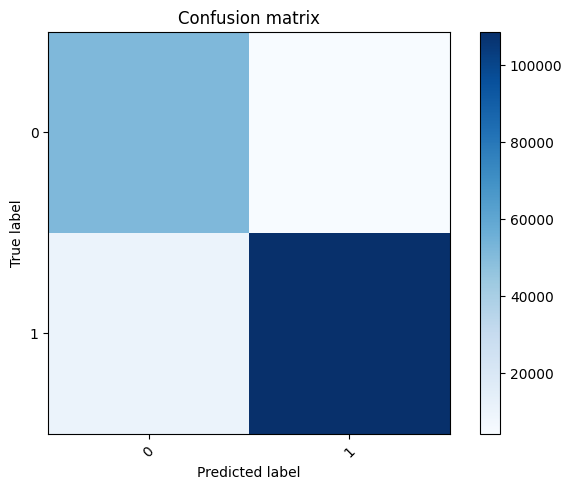

In [288]:
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
classification = metrics.classification_report(y_test, y_pred)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(confusion_matrix, [0, 1])
plt.show()

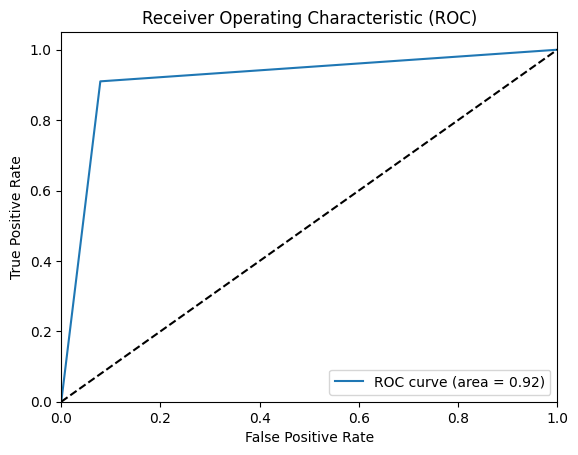

In [289]:
plot_roc(y_pred, y_test)